In [37]:
import pandas as pd
import numpy as np

In [38]:
#Get the data iris from csv file and save it as dataframe
#csv_data = pd.read_csv('//Users/Hilony/Desktop/mlhw01/iris1.csv')
csv_data = pd.read_csv('iris1.csv')

In [39]:
#Randomise the iris dataset
dataF = pd.DataFrame.sample(csv_data,frac=1)

In [40]:
Species = dataF['Species'].values[:]

In [41]:
def mapping(x):
    if(x == 'Iris-virginica'):
        return 1
    elif(x == 'Iris-setosa'):
        return 0
    elif (x == 'Iris-versicolor'):
        return 2


Species1 = list(map(mapping, Species)) 
dataF['Species'] = Species1

#hot encoding-
def mapsetosa(x):
    if(x == 'Iris-setosa'):
        return 1
    else:
        return 0
    
    
def mapvirginica(x):
    if(x == 'Iris-virginica'):
        return 1
    else:
        return 0
    
def mapversicolor(x):
    if(x == 'Iris-versicolor'):
        return 1
    else:
        return 0


Setosa = list(map(mapsetosa, Species))
dataF['Setosa'] = Setosa

Virginica = list(map(mapvirginica, Species))
dataF['Virginica'] = Virginica

Versicolor = list(map(mapversicolor, Species))
dataF['Versicolor'] = Versicolor

print(dataF)

     Sapel_length  Sapel_width  Petal_length  Petal_width  Species  Setosa  \
33            5.5          4.2           1.4          0.2        0       1   
149           5.9          3.0           5.1          1.8        1       0   
24            4.8          3.4           1.9          0.2        0       1   
32            5.2          4.1           1.5          0.1        0       1   
3             4.6          3.1           1.5          0.2        0       1   
16            5.4          3.9           1.3          0.4        0       1   
39            5.1          3.4           1.5          0.2        0       1   
131           7.9          3.8           6.4          2.0        1       0   
111           6.4          2.7           5.3          1.9        1       0   
88            5.6          3.0           4.1          1.3        2       0   
113           5.7          2.5           5.0          2.0        1       0   
145           6.7          3.0           5.2          2.3       

In [42]:
ndataF = dataF

In [43]:
sampleLength = len(ndataF)*0.7 #Taking 70% of the data as training and 30% as testing
trainData = ndataF[0:int(sampleLength)]
testData = ndataF[int(sampleLength):]

trainTarget = trainData['Species']
testTarget = testData['Species']

trainData = trainData.drop(columns = 'Species', axis = 1)
testData = testData.drop(columns = 'Species', axis = 1)

In [44]:
def sig(x):
    sigmoid = 1/(1+np.exp(-x))
    return sigmoid

In [26]:
def sigdifferentiate(x):
    sigdiff = sig(x) * (1-sig(x))
    return sigdiff

In [27]:
def forward(X, W1, W2):
    #forward propagation through our network
    z = X.dot(W1) # dot product of X (input) and first set of 3x2 weights
    z2 = sig(z) # activation function
    z3 = z2.dot(W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = sig(z3) # final activation function
    o = o.rename(columns={0:'Setosa', 1:'Virginica', 2:'Versicolor'})
    
    return z,z2,z3,o

In [28]:
def backward(X,y,z,z2,z3,o,W1,W2):
    # backward propgate through the network
    #y = X['Setosa','Virginica', 'Versicolor']
    
    o_error = o.subtract(y) # error in output = o-y
    
    
    o_delta = o_error*sigdifferentiate(o) # applying derivative of sigmoid to error

    z2_error = o_delta.dot(W2.T) # z2 error: how much our hidden layer weights contributed to output error
    z2_delta = z2_error*sigdifferentiate(z2) # applying derivative of sigmoid to z2 error

    
    W1b = (X.T).dot(z2_delta) # adjusting first set (input --> hidden) weights
    W2b = (z2.T).dot(o_delta) # adjusting second set (hidden --> output) weights
    
    return W1b, W2b

In [29]:
inputSize = 4 #Sapel-length,width, Petal length,width
outputSize = 3 #Sentosa, Versicolor, Versicolor
hiddenSize = 7 # Randonly selected

W1 = np.random.randn(inputSize, hiddenSize) #4x5 
W2 = np.random.randn(hiddenSize, outputSize) #5x3
learningRate = 0.01
lossArr = []

for i in range(0,3000):
    z,z2,z3,o = forward(trainData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']], W1, W2)
    y = trainData[['Setosa','Virginica', 'Versicolor']]
    loss = np.sum((-y* np.log(o)).sum(axis=1)/len(trainData)) 
    W1b, W2b = backward(trainData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']],y,z,z2,z3,o,W1,W2)
    W1 -= learningRate*W1b
    W2 -= learningRate*W2b
    lossArr.append(loss)
    
#print(pd.DataFrame(lossArr))

In [30]:
z,z2,z3,o = forward(testData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']], W1, W2)
o['Maximum'] = o[['Setosa','Virginica','Versicolor']].idxmax(axis=1)
nTestData = ndataF[int(sampleLength):]
def mapping1(x):
    if(x == 1):
        return 'Virginica'
    elif(x == 0):
        return 'Setosa'
    elif (x == 2):
        return 'Versicolor'


out = nTestData['Species'] 
o['output'] = list(map(mapping1, out))




In [31]:
import matplotlib.pyplot as plt

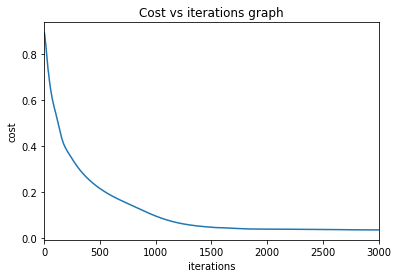

In [32]:
y = np.sort(lossArr)
r = y[::-1]
loop = []
for i in range(0, len(y)):
    loop.append(i)
plt.plot(loop,r)


plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('Cost vs iterations graph')

plt.xlim(0,len(loop))
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
score_sigmoid = accuracy_score(o['Maximum'],o['output'])*100
print("Sigmoid Accuracy: ", score_sigmoid, "%")

Sigmoid Accuracy:  93.33333333333333 %


In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
def tan(x):
    t = (2*sig(2*x))-1
    return t

In [47]:
def tandifferentiate(x):
    tandiff = 1-tan(x)**2
    return tandiff

In [48]:
def forward_tan(X, W1, W2):
    #forward propagation through our network
    z = X.dot(W1) # dot product of X (input) and first set of 3x2 weights
    z2 = tan(z) # activation function
    z3 = z2.dot(W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = tan(z3) # final activation function
    o = o.rename(columns={0:'Setosa', 1:'Virginica', 2:'Versicolor'})
    
    return z,z2,z3,o

In [49]:
def backward_tan(X,y,z,z2,z3,o,W1,W2):
    # backward propgate through the network
    #y = X['Setosa','Virginica', 'Versicolor']
    
    o_error = o.subtract(y) # error in output = o-y
    
    
    o_delta = o_error*tandifferentiate(o) # applying derivative of sigmoid to error

    z2_error = o_delta.dot(W2.T) # z2 error: how much our hidden layer weights contributed to output error
    z2_delta = z2_error*tandifferentiate(z2) # applying derivative of sigmoid to z2 error

    
    W1b = (X.T).dot(z2_delta) # adjusting first set (input --> hidden) weights
    W2b = (z2.T).dot(o_delta) # adjusting second set (hidden --> output) weights
    
    return W1b, W2b

In [50]:
inputSize = 4 #Sapel-length,width, Petal length,width
outputSize = 3 #Sentosa, Versicolor, Versicolor
hiddenSize = 7 # Randonly selected

W1 = np.random.randn(inputSize, hiddenSize) #4x5 
W2 = np.random.randn(hiddenSize, outputSize) #5x3
learningRate = 0.01
lossArr = []

for i in range(0,3000):
    z,z2,z3,o = forward_tan(trainData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']], W1, W2)
    #print(o)
    y = trainData[['Setosa','Virginica', 'Versicolor']]
    loss = np.sum((-y* np.log(o)).sum(axis=1)/len(trainData)) 
    W1b, W2b = backward_tan(trainData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']],y,z,z2,z3,o,W1,W2)
    W1 -= learningRate*W1b
    W2 -= learningRate*W2b
    lossArr.append(loss)
    
#print(pd.DataFrame(lossArr))

In [51]:
z,z2,z3,o = forward_tan(testData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']], W1, W2)
o['Maximum'] = o[['Setosa','Virginica','Versicolor']].idxmax(axis=1)
nTestData = ndataF[int(sampleLength):]
def mapping1(x):
    if(x == 1):
        return 'Virginica'
    elif(x == 0):
        return 'Setosa'
    elif (x == 2):
        return 'Versicolor'


out = nTestData['Species'] 
o['output'] = list(map(mapping1, out))

print(o)


       Setosa  Virginica  Versicolor     Maximum      output
13   0.932553   0.187008    0.041564      Setosa      Setosa
109 -0.044722   0.852551   -0.046473   Virginica   Virginica
34   0.932274   0.201881    0.095656      Setosa      Setosa
42   0.932658   0.180839    0.019301      Setosa      Setosa
81   0.004621   0.365723    0.917804  Versicolor  Versicolor
82   0.203871   0.350545    0.874173  Versicolor  Versicolor
26   0.932575   0.181245    0.019158      Setosa      Setosa
143 -0.049040   0.854104   -0.063363   Virginica   Virginica
22   0.932866   0.176480    0.006281      Setosa      Setosa
92   0.012552   0.372737    0.909747  Versicolor  Versicolor
125 -0.038897   0.859975    0.025871   Virginica   Virginica
21   0.932762   0.177341    0.007664      Setosa      Setosa
97   0.066999   0.383930    0.892168  Versicolor  Versicolor
55  -0.018566   0.851901    0.047333   Virginica  Versicolor
12   0.932220   0.203229    0.099691      Setosa      Setosa
19   0.932846   0.177027

In [52]:
import matplotlib.pyplot as plt

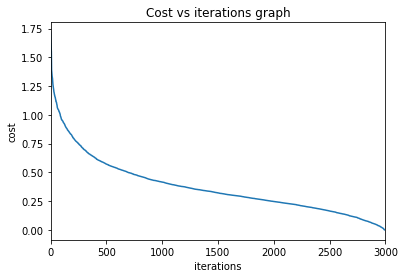

In [53]:
y = np.sort(lossArr)
r = y[::-1]
loop = []
for i in range(0, len(y)):

    loop.append(i)
plt.plot(loop,r)

plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('Cost vs iterations graph')

plt.xlim(0,len(loop))
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

In [56]:
score_tan = accuracy_score(o['Maximum'],o['output'])*100
print("Tan Accuracy: ", score_tan, "%")

Tan Accuracy:  84.44444444444444 %


In [70]:
sampleLength = len(ndataF)*0.7
trainData = ndataF[0:int(sampleLength)]
testData = ndataF[int(sampleLength):]

trainTarget = trainData['Species']
testTarget = testData['Species']

trainData = trainData.drop(columns = 'Species', axis = 1)
testData = testData.drop(columns = 'Species', axis = 1)

In [71]:
def normalizingData(data):
    norm = ((data - data.min())/(data.max()-data.min()))
    return norm

ndataF = normalizingData(dataF)
ndataF['Species'] = dataF['Species']


In [72]:
def relu(x):

    x[x<0] = 0
    return x

In [73]:
def reludifferentiate(x):
    
    x[x>0]=1
    x[x<=0]=0
    return x

In [74]:
def softmax(x):
    x = x - np.max(x)
    e = np.exp(x)
    return e/ e.sum(axis=0)

In [75]:
def forward_relu(X, W1, W2):
    #forward propagation through our network
    z = X.dot(W1) # dot product of X (input) and first set of 3x2 weights
    z2 = relu(z) # activation function
    z3 = z2.dot(W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    #o = relu(z3) # final activation function
    o = z3.apply(softmax,axis = 1)
    o = o.rename(columns={0:'Setosa', 1:'Virginica', 2:'Versicolor'})
    
    #o1 = z3.apply(softmax,axis=1)
    #o1 = o1.rename(columns={0:'Setosa', 1:'Virginica', 2:'Versicolor'})
    return z,z2,z3,o

In [76]:
def backward_relu(X,y,z,z2,z3,o,W1,W2):
    # backward propgate through the network
    #y = X['Setosa','Virginica', 'Versicolor']
    
    o_error = o.subtract(y) # error in output = o-y
    
    
    o_delta = o_error*reludifferentiate(o) # applying derivative of sigmoid to error

    z2_error = o_delta.dot(W2.T) # z2 error: how much our hidden layer weights contributed to output error
    z2_delta = z2_error*reludifferentiate(z2) # applying derivative of sigmoid to z2 error

    
    W1b = (X.T).dot(z2_delta) # adjusting first set (input --> hidden) weights
    W2b = (z2.T).dot(o_delta) # adjusting second set (hidden --> output) weights
    
    return W1b, W2b

In [77]:
inputSize = 4 #Sapel-length,width, Petal length,width
outputSize = 3 #Sentosa, Versicolor, Versicolor
hiddenSize = 7 # Randonly selected

W1 = np.random.randn(inputSize, hiddenSize) #4x5 
W2 = np.random.randn(hiddenSize, outputSize) #5x3
learningRate = 0.01
lossArr = []

for i in range(0,1000):
    z,z2,z3,o = forward_relu(trainData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']], W1, W2)
    y = trainData[['Setosa','Virginica', 'Versicolor']]
    loss = np.sum((-y* np.log(o)).sum(axis=1)/len(trainData)) 
    W1b, W2b = backward_relu(trainData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']],y,z,z2,z3,o,W1,W2)
    W1 -= learningRate*W1b
    W2 -= learningRate*W2b
    lossArr.append(loss)
    
#print(pd.DataFrame(lossArr))

In [78]:
z,z2,z3,o = forward_relu(testData[['Sapel_length', 'Sapel_width','Petal_length','Petal_width']], W1, W2)
o['Maximum'] = o[['Setosa','Virginica','Versicolor']].idxmax(axis=1)
nTestData = ndataF[int(sampleLength):]
def mapping1(x):
    if(x == 1):
        return 'Virginica'
    elif(x == 0):
        return 'Setosa'
    elif (x == 2):
        return 'Versicolor'


out = nTestData['Species'] 
o['output'] = list(map(mapping1, out))

print(o)



       Setosa     Virginica    Versicolor     Maximum      output
13   0.999999  1.469467e-18  1.463193e-06      Setosa      Setosa
109  0.000061  4.894931e-01  5.104458e-01  Versicolor   Virginica
34   0.999996  9.329678e-17  4.018011e-06      Setosa      Setosa
42   1.000000  1.257192e-20  4.103856e-07      Setosa      Setosa
81   0.011581  4.898946e-01  4.985240e-01  Versicolor  Versicolor
82   0.005312  4.920932e-01  5.025953e-01  Versicolor  Versicolor
26   0.999998  3.050952e-18  2.113457e-06      Setosa      Setosa
143  0.000155  4.905293e-01  5.093157e-01  Versicolor   Virginica
22   1.000000  8.897774e-26  3.975078e-09      Setosa      Setosa
92   0.005350  4.920826e-01  5.025676e-01  Versicolor  Versicolor
125  0.000194  4.907721e-01  5.090337e-01  Versicolor   Virginica
21   1.000000  1.146254e-22  5.457170e-08      Setosa      Setosa
97   0.002416  4.926085e-01  5.049756e-01  Versicolor  Versicolor
55   0.003616  4.913681e-01  5.050160e-01  Versicolor  Versicolor
12   0.999

In [79]:
import matplotlib.pyplot as plt

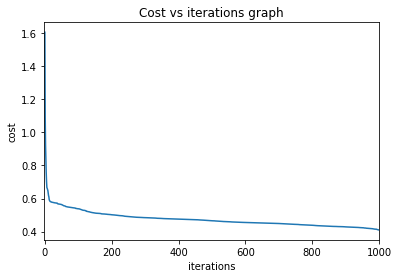

In [80]:
y = np.sort(lossArr)
r = y[::-1]
loop = []
for i in range(0, len(y)):
    loop.append(i)
plt.plot(loop,r)

plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('Cost vs iterations graph')

plt.xlim(-2,len(loop))
plt.show()

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
score_sigmoid = accuracy_score(o['Maximum'],o['output'])*100
print("Relu Accuracy: ", score_sigmoid, "%")

Relu Accuracy:  73.33333333333333 %
